In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('wine.csv',header=None,usecols=[0,1,2])
df.columns=['Class Label','Alcohol','Malic acid']

In [3]:
df.sample(5)

,Class Label,Alcohol,Malic acid
30,1,13.73,1.50
72,2,13.49,1.66
104,2,12.51,1.73
125,2,12.07,2.16
131,3,12.88,2.99


<Axes: xlabel='Alcohol', ylabel='Density'>

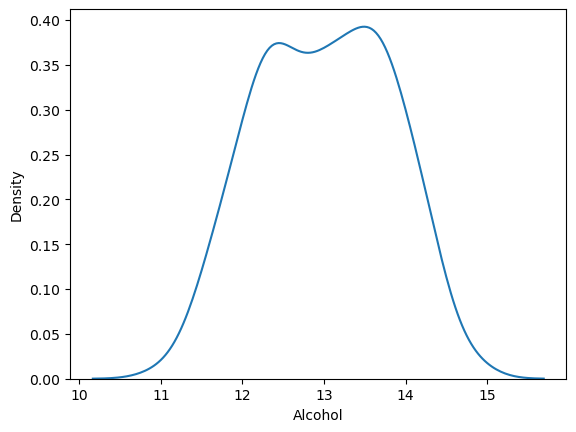

In [4]:
sns.kdeplot(df.Alcohol)

<Axes: xlabel='Malic acid', ylabel='Density'>

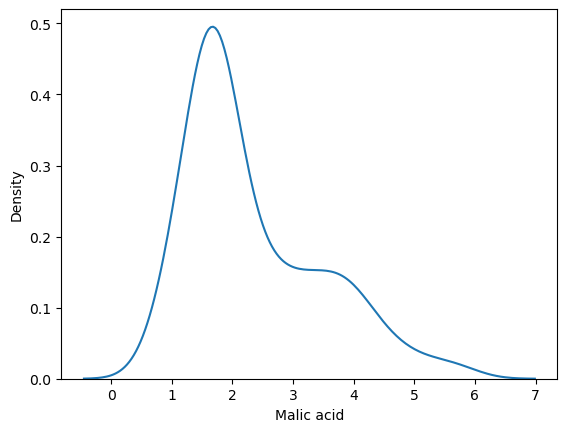

In [5]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

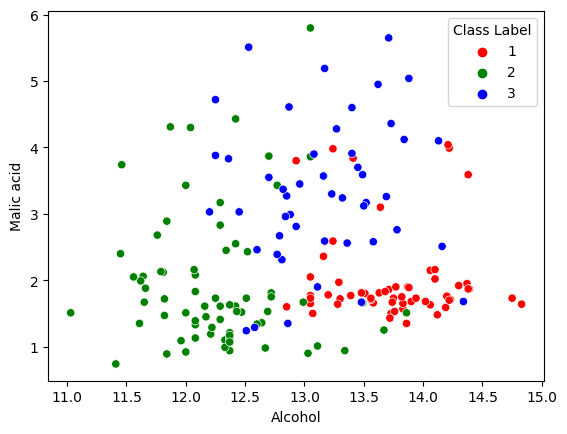

In [6]:
color_dict={1:'red',2:'green',3:'blue'}
sns.scatterplot(data=df,x='Alcohol',y='Malic acid',hue='Class Label',palette=color_dict)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Class Label',axis=1),df["Class Label"],test_size=0.3,random_state=0)

x_test.shape, x_train.shape

((54, 2), (124, 2))

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [9]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [11]:
x_train_scaled.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


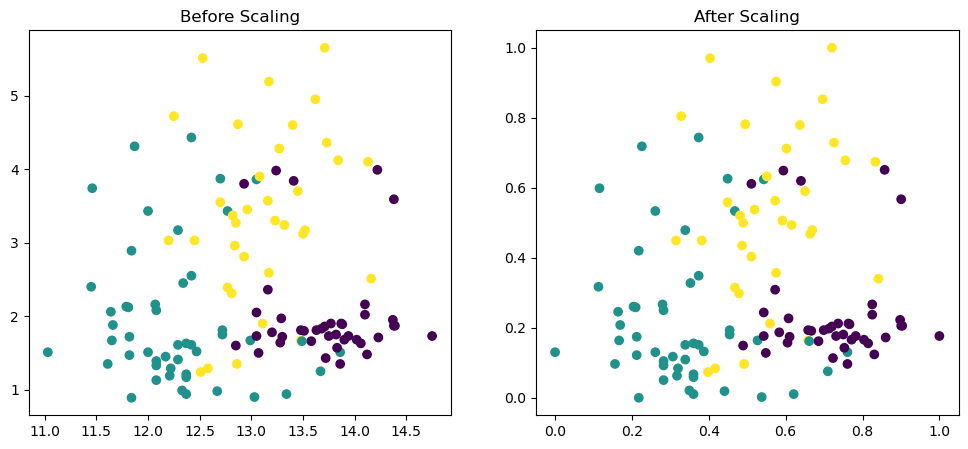

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Malic acid'],c=y_train)
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")

plt.show()

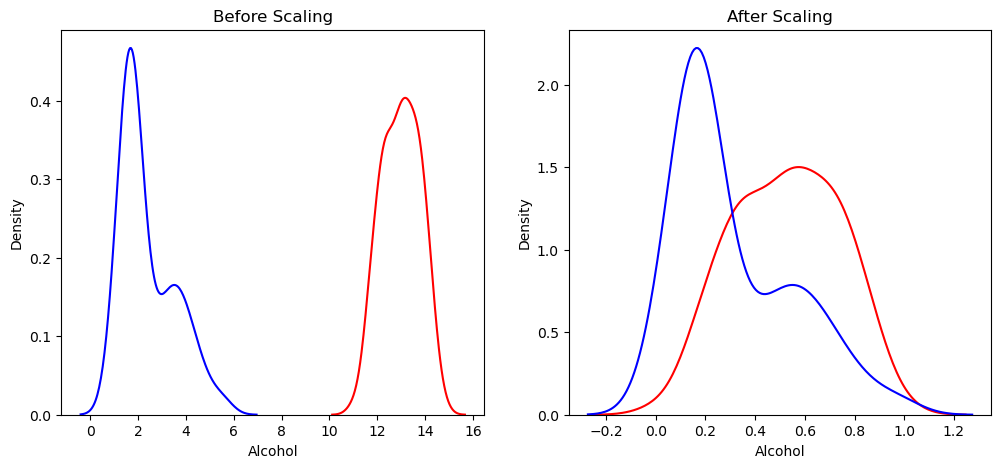

In [18]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(x_train['Alcohol'],ax=ax1,color='red')
sns.kdeplot(x_train['Malic acid'],ax=ax1,color='blue')
ax1.set_title("Before Scaling")

sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2,color='red')
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2,color='blue')
ax2.set_title('After Scaling')
plt.show()

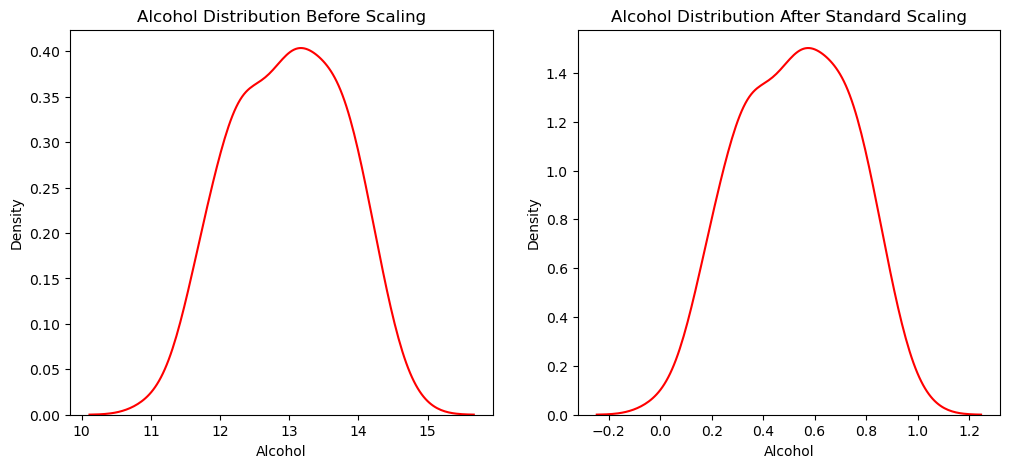

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1,color='red')

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2,color='red')
plt.show()

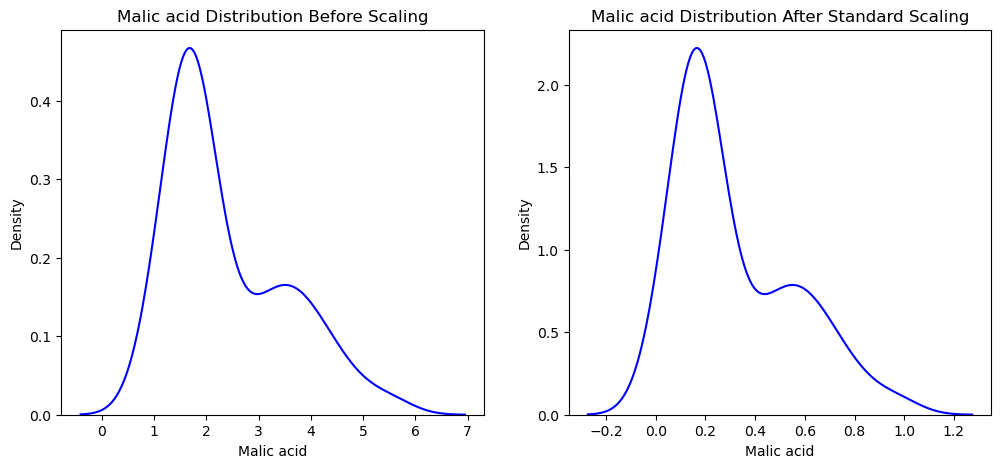

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(x_train['Malic acid'], ax=ax1,color='blue')

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2,color='blue')
plt.show()